In [77]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [78]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [79]:
from keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)   # Rescale pixel values to [0, 1]

train_generator = train_datagen.flow_from_directory(
    'TRAIN_SET_FINAL',  # Path to the training data directory
    target_size=(32, 32),  # Resize images to (32, 32)
    batch_size=32,  # Number of samples per batch
    class_mode='categorical'  # Type of label encoding
)

test_generator = test_datagen.flow_from_directory(
    'TEST_SET_FINAL',   # Path to the testing data directory
    target_size=(32, 32),  # Resize images to (32, 32)
    batch_size=32,  # Number of samples per batch
    class_mode='categorical'  # Type of label encoding
)

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [73]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [74]:
train = train_gen.flow_from_directory('TRAIN_SET_FINAL',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

test = test_gen.flow_from_directory('TEST_SET_FINAL',
target_size=(120, 120),
class_mode='categorical',
batch_size=8)

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [81]:
train_class_indices = train_generator.class_indices
test_class_indices = test_generator.class_indices

print(train_class_indices)
print(test_class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [82]:
from collections import Counter as c
c(train.labels)

Counter({0: 606, 1: 445, 2: 621, 3: 475, 4: 479})

In [67]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 91s 57ms/step - loss: 0.8138 - accuracy: 0.7143 - val_loss: 0.8682 - val_accuracy: 0.6988
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7633 - accuracy: 0.7334 - val_loss: 0.8761 - val_accuracy: 0.6972
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7155 - accuracy: 0.7481 - val_loss: 0.8722 - val_accuracy: 0.7028
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6727 - accuracy: 0.7630 - val_loss: 0.8611 - val_accuracy: 0.7083
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6311 - accuracy: 0.7762 - val_loss: 0.8877 - val_accuracy: 0.7049
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.5938 - accuracy: 0.7898 - val_loss: 0.8750 - val_accuracy: 0.7168
Epoch 7/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.5571 - accuracy: 0.8038 - val_loss: 0.8918 -

In [83]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters, each filter size is 3x3, and ReLU activation
# Input shape is (32, 32, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a MaxPooling2D layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters, each filter size is 3x3, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Add another Conv2D layer with 64 filters, each filter size is 3x3, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a Dense layer with 5 units (for the output classes) and softmax activation
model.add(Dense(5, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [84]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:

# Train the model
history = model.fit(
    train_generator,  # Training data generator
    epochs=20,  # Number of epochs
    validation_data=test_generator,  # Testing data generator
    verbose=1  # Print training progress
)


Epoch 1/20
83/83 [==============================] - 36s 386ms/step - loss: 0.3446 - accuracy: 0.8778 - val_loss: 0.0609 - val_accuracy: 0.9659
Epoch 2/20
83/83 [==============================] - 6s 72ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1125 - val_accuracy: 0.9536
Epoch 3/20
83/83 [==============================] - 6s 71ms/step - loss: 3.9532e-04 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 0.9517
Epoch 4/20
83/83 [==============================] - 6s 67ms/step - loss: 1.8006e-04 - accuracy: 1.0000 - val_loss: 0.1377 - val_accuracy: 0.9431
Epoch 5/20
83/83 [==============================] - 6s 67ms/step - loss: 8.8022e-05 - accuracy: 1.0000 - val_loss: 0.1336 - val_accuracy: 0.9441
Epoch 6/20
83/83 [==============================] - 5s 66ms/step - loss: 5.0384e-05 - accuracy: 1.0000 - val_loss: 0.1515 - val_accuracy: 0.9422
Epoch 7/20
83/83 [==============================] - 5s 66ms/step - loss: 3.5616e-05 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy

In [86]:
import numpy as np
from tensorflow.keras.preprocessing import image
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# model=load_model('model.h5')

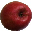

In [94]:
img = image.load_img('TEST_SET_FINAL/APPLES/0_100.jpg',target_size=(32,32))
img

In [95]:
img = image.img_to_array(img)
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 255., 255.],
        [254., 255., 253.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 254., 255.],
        [255., 252., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 255., 255.],
        [251., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 254., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [254., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [254., 255., 255.],
        [254., 255., 253.],
        ...,
        [255., 255., 255.],
        [255., 254., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [96]:
img = np.expand_dims(img,axis=0)
img

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 255., 255.],
         [254., 255., 253.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 254., 255.],
         [255., 252., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 255., 255.],
         [251., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 254., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [254., 255., 255.],
         [254., 255., 253.],
         ...,
         [255., 255., 255.],
         [255., 254., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [97]:
pred_probabilities = model.predict(img)
pred_classes = np.argmax(pred_probabilities, axis=1)

1/1 [==============================] - 0s 21ms/step


In [99]:
# Map class indices to fruit names
fruit_mapping = {'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

if pred_classes[0] == 0:
    print("It's an Apple")
elif pred_classes[0] == 1:
    print("It's a Banana")
elif pred_classes[0] == 2:
    print("It's a Pineapple")
elif pred_classes[0] == 3:
    print("It's a Watermelon")
else:
    print("It's an Orange")

print("Predicted class index:", pred_classes[0])

It's an Apple
Predicted class index: 0


In [100]:
#Saving our model
model.save('model.h5')